In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
raw_data = pd.read_csv(r'C:/Users/ketan/Downloads/DMSP_Dataset.csv')

In [4]:
raw_data.shape

(77367, 154)

In [5]:
# raw_data.isna().sum()

In [6]:
# raw_data.head(5)

In [7]:
# raw_data.tail(5)

In [8]:
raw_data.duplicated().sum()

0

In [9]:
# cols = raw_data.columns.tolist()
# for i in cols:
#     print(i,raw_data.duplicated(i).sum())

In [10]:
# raw_data.corr()['ELE_TOTAL_ENERGY_FLUX']

In [11]:
# raw_data.describe()

In [12]:
raw_data['Datetimes'] = pd.to_datetime(raw_data['Datetimes'])
raw_data['Hours'] = raw_data['Datetimes'].dt.hour
raw_data['Minutes'] = raw_data['Datetimes'].dt.minute
raw_data['Seconds'] = raw_data['Datetimes'].dt.second

In [14]:
raw_data.shape

(77367, 157)

In [15]:
raw_data['Seconds'].value_counts()

0    77367
Name: Seconds, dtype: int64

In [16]:
raw_data.drop(columns=['Datetimes','Seconds'],inplace=True)
raw_data.shape

(77367, 155)

In [20]:
raw_data.head(1)

,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,Bz,By,Bx,AE,AL,AU,SymH,PC,vsw,vx,psw,borovsky,newell,F107_6hr,Bz_6hr,By_6hr,Bx_6hr,AE_6hr,AL_6hr,AU_6hr,SymH_6hr,PC_6hr,vsw_6hr,vx_6hr,psw_6hr,borovsky_6hr,newell_6hr,F107_5hr,Bz_5hr,By_5hr,Bx_5hr,AE_5hr,AL_5hr,AU_5hr,SymH_5hr,PC_5hr,vsw_5hr,vx_5hr,psw_5hr,borovsky_5hr,newell_5hr,F107_3hr,Bz_3hr,By_3hr,Bx_3hr,AE_3hr,AL_3hr,AU_3hr,SymH_3hr,PC_3hr,vsw_3hr,vx_3hr,psw_3hr,borovsky_3hr,newell_3hr,F107_1hr,Bz_1hr,By_1hr,Bx_1hr,AE_1hr,AL_1hr,AU_1hr,SymH_1hr,PC_1hr,vsw_1hr,vx_1hr,psw_1hr,borovsky_1hr,newell_1hr,F107_45min,Bz_45min,By_45min,Bx_45min,AE_45min,AL_45min,AU_45min,SymH_45min,PC_45min,vsw_45min,vx_45min,psw_45min,borovsky_45min,newell_45min,F107_30min,Bz_30min,By_30min,Bx_30min,AE_30min,AL_30min,AU_30min,SymH_30min,PC_30min,vsw_30min,vx_30min,psw_30min,borovsky_30min,newell_30min,F107_15min,Bz_15min,By_15min,Bx_15min,AE_15min,AL_15min,AU_15min,SymH_15min,PC_15min,vsw_15min,vx_15min,psw_15min,borovsky_15min,newell_15min,F107_10min,Bz_10min,By_10min,Bx_10min,AE_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,vx_10min,psw_10min,borovsky_10min,newell_10min,F107_5min,Bz_5min,By_5min,Bx_5min,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,Hours,Minutes
0,51.14322,5.664024,205782700.0,0.41123,39.89341,0.411485,6.0,-0.246153,-0.969231,0.205104,0.97874,0.996134,0.087845,68.9,2.78,6.4,-3.49,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.2,14199.368957,1847.748015,68.9,3.143333,5.213333,-2.8775,93.333333,-18.75,74.333333,-7.916667,1.341667,337.7,-337.25,3.9775,13556.319494,1205.609958,68.9,1.155,6.5025,0.4375,52.416667,-4.25,47.916667,3.0,0.960833,346.291667,-345.825,4.9125,29030.966525,2643.564215,68.9,3.435,9.126667,0.365,79.5,-48.666667,30.0,7.666667,0.27,362.783333,-361.516667,5.326667,19770.271225,2783.159088,68.9,3.98,4.96,0.578333,214.833333,-169.5,45.0,7.5,0.83,368.283333,-367.983333,4.765,15725.454759,1005.416768,68.9,2.81,6.06,1.0,137.0,-107.0,30.0,7.0,0.53,363.8,-363.4,4.42,19981.769117,1765.410665,68.9,0.56,7.67,-2.12,74.0,-48.0,25.0,5.0,0.51,354.0,-353.7,3.61,23353.905886,3500.619134,68.9,1.72,7.02,-2.64,61.0,-37.0,23.0,3.0,0.61,354.6,-354.1,3.13,17383.697547,2591.563107,68.9,1.25,6.52,-3.03,56.0,-36.0,19.0,4.0,0.71,364.4,-363.6,3.09,19335.344017,2762.596108,68.9,1.51,6.42,-2.72,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963,12,57


In [105]:
corr = raw_data.corr()['ELE_TOTAL_ENERGY_FLUX']
corr_threshold = 0.001
low_corr_cols = corr[abs(corr)<corr_threshold].index

In [108]:
raw_data.drop(columns=low_corr_cols,inplace=True)

In [109]:
raw_data.head(1)

,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,By,Bx,AE,AL,AU,SymH,borovsky,newell,F107_6hr,By_6hr,AL_6hr,AU_6hr,SymH_6hr,PC_6hr,newell_6hr,F107_5hr,By_5hr,AE_5hr,AL_5hr,SymH_5hr,PC_5hr,F107_3hr,Bz_3hr,By_3hr,Bx_3hr,AE_3hr,AL_3hr,AU_3hr,SymH_3hr,PC_3hr,borovsky_3hr,newell_3hr,F107_1hr,By_1hr,Bx_1hr,AL_1hr,AU_1hr,SymH_1hr,PC_1hr,F107_45min,Bz_45min,By_45min,Bx_45min,AU_45min,SymH_45min,PC_45min,borovsky_45min,newell_45min,F107_30min,Bz_30min,By_30min,AE_30min,AL_30min,AU_30min,SymH_30min,PC_30min,borovsky_30min,newell_30min,F107_15min,Bz_15min,By_15min,Bx_15min,AU_15min,SymH_15min,PC_15min,borovsky_15min,newell_15min,F107_10min,By_10min,Bx_10min,SymH_10min,PC_10min,F107_5min,By_5min,AE_5min,AL_5min,AU_5min,SymH_5min,borovsky_5min,Minutes
0,51.14322,5.664024,205782700.0,0.41123,39.89341,0.411485,6.0,-0.969231,0.205104,0.97874,0.996134,0.087845,68.9,6.4,-3.49,82.0,-58.0,24.0,3.0,14199.368957,1847.748015,68.9,5.213333,-18.75,74.333333,-7.916667,1.341667,1205.609958,68.9,6.5025,52.416667,-4.25,3.0,0.960833,68.9,3.435,9.126667,0.365,79.5,-48.666667,30.0,7.666667,0.27,19770.271225,2783.159088,68.9,4.96,0.578333,-169.5,45.0,7.5,0.83,68.9,2.81,6.06,1.0,30.0,7.0,0.53,19981.769117,1765.410665,68.9,0.56,7.67,74.0,-48.0,25.0,5.0,0.51,23353.905886,3500.619134,68.9,1.72,7.02,-2.64,23.0,3.0,0.61,17383.697547,2591.563107,68.9,6.52,-3.03,4.0,0.71,68.9,6.42,86.0,-61.0,25.0,3.0,17439.640589,57


In [110]:
raw_data.shape

(77367, 93)

In [188]:
X = raw_data.iloc[:, list(range(2)) + list(range(3, 93))]
y = raw_data.iloc[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=7)

In [189]:
imp = SimpleImputer(strategy='most_frequent')
X_train_imp = imp.fit_transform(X_train)
X_val_imp = imp.transform(X_val)
X_test_imp = imp.transform(X_test)

scl = MinMaxScaler()
X_train_scl = scl.fit_transform(X_train_imp)
X_val_scl = scl.transform(X_val_imp)
X_test_scl = scl.transform(X_test_imp)

y_train_log = np.log10(y_train)
y_val_log = np.log10(y_val)
y_test_log = np.log10(y_test)                    

In [196]:
X_train = X_train_scl.astype(float)
X_val = X_val_scl.astype(float)
X_test = X_test_scl.astype(float)

y_train = y_train_log.astype(float)
y_val = y_val_log.astype(float)
y_test = y_test_log.astype(float)

In [197]:
X_train.shape

(55703, 92)

In [198]:
# creating the function for calculation of R2-score
from keras import backend as K
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [199]:
model = Sequential()
model.add(Dense(60, input_dim=X_train.shape[1], kernel_initializer='uniform', activation = keras.layers.LeakyReLU()))
model.add(Dense(10, kernel_initializer='uniform', activation = keras.layers.LeakyReLU()))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(40, activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [200]:
metric = [tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error"),r2_score]
model.compile(loss='mean_squared_error', optimizer='adam', metrics=metric)
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 60)                5580      
                                                                 
 dense_112 (Dense)           (None, 10)                610       
                                                                 
 dense_113 (Dense)           (None, 1)                 11        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [208]:
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=2)
history = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=100, batch_size=80,callbacks=reduce_lr_callback)

Epoch 1/100
697/697 [==============================] - 2s 3ms/step - loss: 0.1524 - root_mean_squared_error: 0.3903 - r2_score: 0.8681 - val_loss: 0.1500 - val_root_mean_squared_error: 0.3873 - val_r2_score: 0.8696 - lr: 0.0010
Epoch 2/100
697/697 [==============================] - 2s 3ms/step - loss: 0.1488 - root_mean_squared_error: 0.3857 - r2_score: 0.8711 - val_loss: 0.1442 - val_root_mean_squared_error: 0.3798 - val_r2_score: 0.8753 - lr: 0.0010
Epoch 3/100
697/697 [==============================] - 3s 4ms/step - loss: 0.1483 - root_mean_squared_error: 0.3851 - r2_score: 0.8711 - val_loss: 0.1420 - val_root_mean_squared_error: 0.3768 - val_r2_score: 0.8771 - lr: 0.0010
Epoch 4/100
697/697 [==============================] - 3s 4ms/step - loss: 0.1461 - root_mean_squared_error: 0.3822 - r2_score: 0.8738 - val_loss: 0.1411 - val_root_mean_squared_error: 0.3756 - val_r2_score: 0.8780 - lr: 0.0010
Epoch 5/100
697/697 [==============================] - 3s 4ms/step - loss: 0.1437 - root

697/697 [==============================] - 3s 4ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8881 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-16
Epoch 37/100
697/697 [==============================] - 3s 4ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8881 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-17
Epoch 38/100
697/697 [==============================] - 2s 3ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8881 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-17
Epoch 39/100
697/697 [==============================] - 2s 3ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8879 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-18
Epoch 40/100
697/697 [==============================] - 2s 3ms/step - loss: 0.129

697/697 [==============================] - 3s 4ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8877 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-34
Epoch 72/100
697/697 [==============================] - 3s 4ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8880 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-34
Epoch 73/100
697/697 [==============================] - 3s 4ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8882 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-35
Epoch 74/100
697/697 [==============================] - 3s 4ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602 - r2_score: 0.8878 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662 - val_r2_score: 0.8840 - lr: 1.0000e-35
Epoch 75/100
697/697 [==============================] - 3s 4ms/step - loss: 0.129

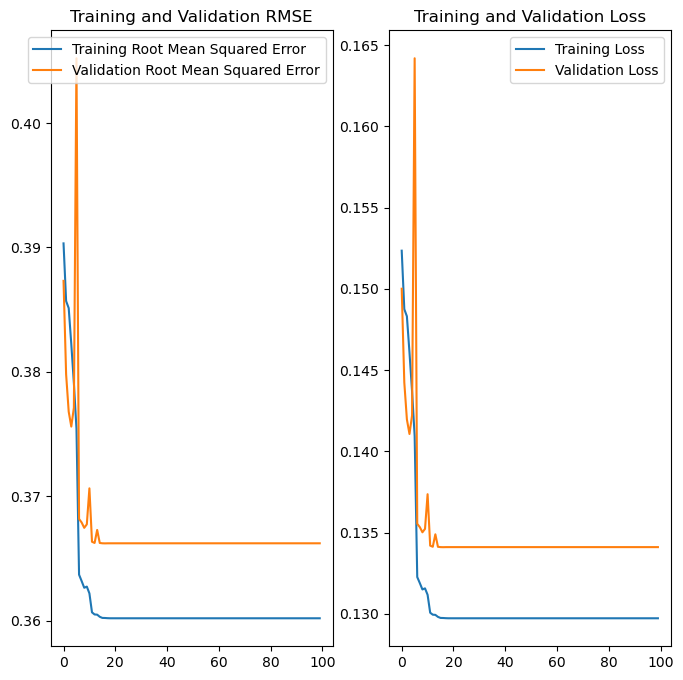

In [210]:
# code for plotting the results from the model for loss and root mean square error
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='upper right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()